In [53]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 


In [54]:
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC
from simplemc.models.HolographicCosmology import HolographicCosmology
from simplemc.models.SplineGHDECosmology import SplineGHDECosmology

from simplemc.models.GeneralHDECosmology import GeneralHDECosmology 


Initalizing nu density look up table... Done


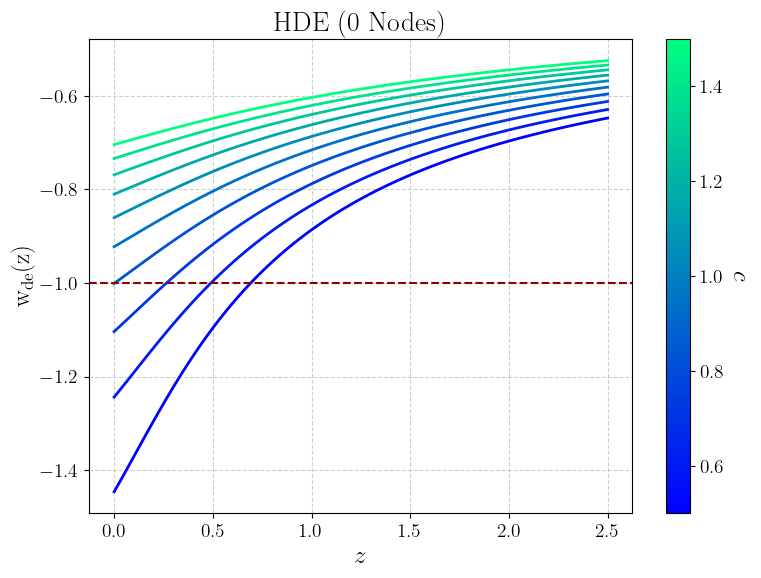

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Use serif font
    "font.size": 14,  # Set font size
})

# Initialize the SplineGHDECosmology instance for 0 nodes
nodes = 0
T = SplineGHDECosmology(mean=-2.0, nodes=nodes, interp='lineal')



# Define the range of T.params[0] values
c_data = np.linspace(0.5, 1.5, 10)  # 10 values in the range for visualization

# Define the redshift values
zvals = T.zvals

# Create a colormap
ccmap = plt.cm.winter
norm = plt.Normalize(vmin=c_data.min(), vmax=c_data.max())

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through c_data values and plot lines with corresponding colors
for val in c_data:
    T.c_par.setValue(val)  # Set the value of the parameter c
    T.updateParams([T.c_par])  # Update the model with the new parameter value
    color = ccmap(norm(val))  # Map val to a color in the colormap
    ax.plot(zvals, [T.EoS(z) for z in zvals], color=color, label=f'$w$ ($c = {val:.2f}$)', linewidth=2)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=norm)
sm.set_array([])  # Set an empty array to avoid warnings

# Add the colorbar to the axis
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r"$c$", rotation=270, labelpad=20, fontsize=18)

# Add labels and layout
ax.set_ylabel(r"$\rm w_{de}(z)$", fontsize=18)
ax.set_xlabel(r"$z$", fontsize=18)
ax.set_title(r"HDE (0 Nodes)", fontsize=20)

# Add a horizontal line at w = -1
plt.axhline(y=-1.0, linestyle='--', color='darkred', label='$w = -1$')

# Add a grid
ax.grid(True, linestyle='--', alpha=0.6)



# Save the plot in high quality
plt.tight_layout()
plt.savefig("HDE_0node.pdf", dpi=300, bbox_inches='tight')

# Show the plotx
plt.show()

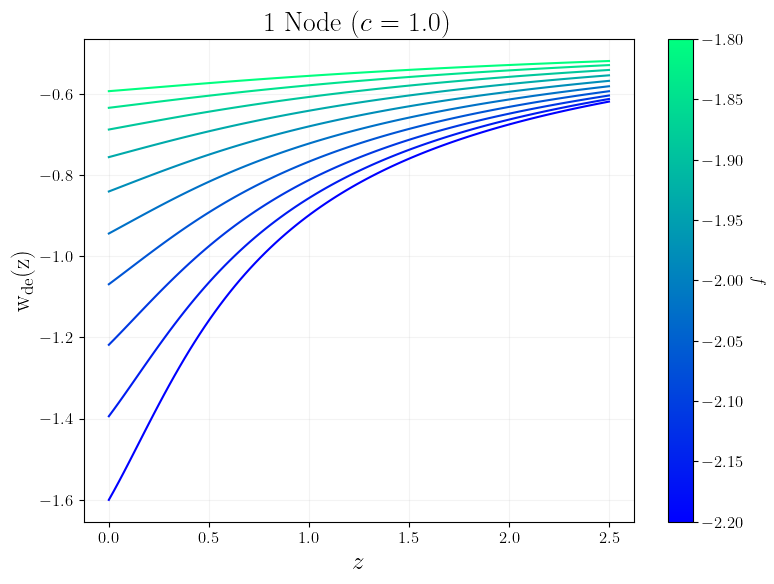

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Use serif font
    "font.size": 12,  # Set font size
})


nodes = 1
T=SplineGHDECosmology(nodes=nodes, interp='lineal')

# Define the range of T.params[0] values
param_values = np.linspace(-2.2, -1.8, 10)  # 5 values in the range for visualization

# Define the redshift range
zvals = T.zvals
avals = 1/(1+zvals)
c_fix = 1.0
T.c_par.setValue(c_fix)
T.updateParams([T.c_par])

# Create a colormap
ccmap = plt.cm.winter
norm = plt.Normalize(vmin=param_values.min(), vmax=param_values.max())

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

for p in param_values:
    # Update the parameter
    T.params[0].value = p
    T.updateParams([T.params[0]])
    
    
    # Compute EoS for the given parameter value
    eos_values = [T.EoS(z) for z in zvals]
    
    # Assign color based on parameter value
    color = ccmap(norm(p))
    
    # Plot
    plt.plot(zvals, eos_values, color=color, label=f'$f = {p:.2f}$')

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=norm)
sm.set_array([])  # Avoids warnings

# Add colorbar to the plot
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r"$f$", rotation=270, labelpad=15)

# Labels and formatting
# Add labels and layout
plt.ylabel(r"$\rm w_{de}(z)$", fontsize=18)
plt.xlabel(r"$z$", fontsize=18)
plt.title(f'1 Node ($c$ = {c_fix:.1f})',fontsize=20)


plt.grid(linestyle='-',alpha = 0.15)
plt.tight_layout()
#plt.savefig("HDE_1node.pdf", dpi=300, bbox_inches='tight')
plt.show()


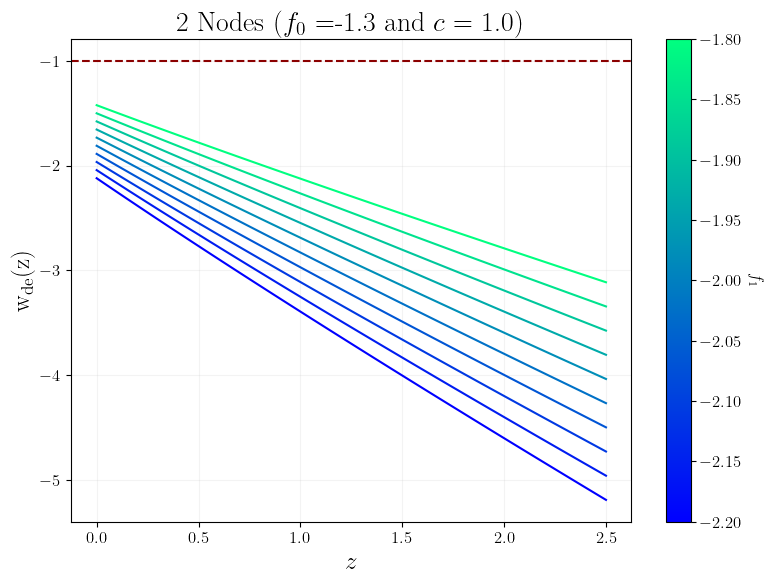

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Use serif font
    "font.size": 12,  # Set font size
})


nodes = 2
T2=SplineGHDECosmology(nodes=2, interp='lineal')

# Define the range of T.params[0] values
param_values = np.linspace(-2.2, -1.8, 10)  # 5 values in the range for visualization

# Define the redshift range
zvals = T2.zvals

c_fix = 1.0
T2.c_par.setValue(c_fix)
T2.updateParams([T2.c_par])

nodo = -1.31
T2.params[0].setValue(nodo)
T2.updateParams([T2.params[0]])


# Create a colormap
ccmap = plt.cm.winter
norm = plt.Normalize(vmin=param_values.min(), vmax=param_values.max())

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

for p in param_values:
    # Update the parameter
    T2.params[1].value = p
    T2.updateParams([T2.params[1]])

    
    
    # Compute EoS for the given parameter value
    eos_values = [T2.EoS(z) for z in zvals]
    
    # Assign color based on parameter value
    color = ccmap(norm(p))
    
    # Plot
    plt.plot(zvals, eos_values, color=color, label=f'$f_1 = {p:.2f}$')

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap=ccmap, norm=norm)
sm.set_array([])  # Avoids warnings

# Add colorbar to the plot
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r"$f_1$", rotation=270, labelpad=15)

# Labels and formatting
#plt.ylabel('$\\Omega_{de}$')

# Add labels and layout
plt.ylabel(r"$\rm w_{de}(z)$", fontsize=18)
plt.xlabel(r"$z$", fontsize=18)
plt.title(f'2 Nodes ($f_0$ ={nodo:.1f} and $c$ = {c_fix:.1f})',fontsize=20)
plt.axhline(y=-1.0, linestyle='--', color='darkred', label='$w = -1$')

plt.grid(linestyle='-',alpha = 0.15)
plt.tight_layout()
#plt.savefig("HDE_2node3.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [25]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

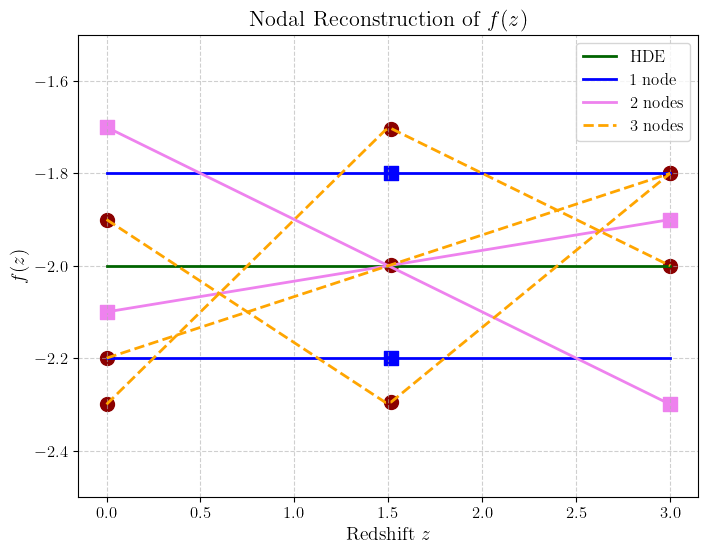

In [ ]:
import matplotlib.pyplot as plt

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Use serif font
    "font.size": 12,  # Set font size
})

# Initialize the SplineGHDECosmology instances
# 0-node case (constant function)
T = SplineGHDECosmology(mean=-2.0, nodes=0, interp='lineal')
# 1-node case
T1 = SplineGHDECosmology(mean=-2.0, nodes=1, interp='lineal')
# 2-node case
T2 = SplineGHDECosmology(mean=-2.0, nodes=2, interp='lineal')
# 3-node case
T3 = SplineGHDECosmology(mean=-2.0, nodes=3, interp='lineal')

# Define the node values for the 2-node case
nodo21 = [-2.1, -1.9]  # First set of nodes
nodo22 = [-1.7, -2.3]  # Second set of nodes

# Define the node values for the 3-node case
nodo31 = [-2.2, -2.0, -1.8]  # First set of nodes
nodo32 = [-1.9, -2.3, -1.8]  # Second set of nodes
nodo33 = [-2.3, -1.7, -2.0]  # Third set of nodes

# Define colors and markers for each case
colors = {
    0: 'darkgreen',  # 0-node case
    1: 'blue',       # 1-node case
    2: 'violet',     # 2-node case
    3: 'orange',     # 3-node case
    4: 'darkred'     # Color for nodes in the 3-node case
}
marker = 's'  # Square marker for nodes

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot f(z) for the 0-node case (constant function)
ax.plot(T.zvals, [T.ffunc(i) for i in T.zvals], color=colors[0], label='HDE', linewidth=2)

# Plot f(z) for the 1-node case and mark the node
for node_value in [-2.2, -1.8]:  # Example node values for 1-node case
    T1.params[0].setValue(node_value)
    T1.updateParams([T1.params[0]])
    ax.plot(T1.zvals, [T1.ffunc(i) for i in T1.zvals], color=colors[1], label='1 node' if node_value == -2.2 else "", linewidth=2)
    node_z = T1.zvals[len(T1.zvals) // 2]  # Middle of the redshift range (for 1 node)
    node_f = T1.ffunc(node_z)  # Value of f(z) at the node
    ax.scatter(node_z, node_f, color=colors[1], marker=marker, s=100)  # s=100 sets the marker size

# Plot f(z) for the 2-node case and mark the nodes
for i, nodes in enumerate([nodo21, nodo22]):
    # Set the node values
    T2.params[0].setValue(nodes[0])
    T2.params[1].setValue(nodes[1])
    T2.updateParams([T2.params[0], T2.params[1]])
    
    # Plot the interpolated function
    ax.plot(T2.zvals, [T2.ffunc(i) for i in T2.zvals], color=colors[2], label='2 nodes' if i == 0 else "", linewidth=2)
    
    # Mark the nodes
    node_z1 = T2.zvals[0]  # First node (zini)
    node_z2 = T2.zvals[-1]  # Second node (zend)
    node_f1 = T2.ffunc(node_z1)  # Value of f(z) at the first node
    node_f2 = T2.ffunc(node_z2)  # Value of f(z) at the second node
    ax.scatter(node_z1, node_f1, color=colors[2], marker=marker, s=100)
    ax.scatter(node_z2, node_f2, color=colors[2], marker=marker, s=100)

# Plot f(z) for the 3-node case and mark the nodes
for i, nodes in enumerate([nodo31, nodo32, nodo33]):
    # Set the node values
    T3.params[0].setValue(nodes[0])
    T3.params[1].setValue(nodes[1])
    T3.params[2].setValue(nodes[2])
    T3.updateParams([T3.params[0], T3.params[1], T3.params[2]])
    
    # Plot the interpolated function
    ax.plot(T3.zvals, [T3.ffunc(i) for i in T3.zvals], '--', color=colors[3], label='3 nodes' if i == 0 else "", linewidth=2)
    
    # Mark the nodes
    node_z1 = T3.zvals[0]  # First node (zini)
    node_z2 = T3.zvals[len(T3.zvals) // 2]  # Middle node
    node_z3 = T3.zvals[-1]  # Third node (zend)
    node_f1 = T3.ffunc(node_z1)  # Value of f(z) at the first node
    node_f2 = T3.ffunc(node_z2)  # Value of f(z) at the middle node
    node_f3 = T3.ffunc(node_z3)  # Value of f(z) at the third node
    ax.scatter(node_z1, node_f1, color=colors[4], marker='o', s=100)
    ax.scatter(node_z2, node_f2, color=colors[4], marker='o', s=100)
    ax.scatter(node_z3, node_f3, color=colors[4], marker='o', s=100)

# Add labels, legend, and show the plot
ax.set_xlabel('Redshift $z$', fontsize=14)
ax.set_ylabel('$f(z)$', fontsize=14)
ax.set_title('Nodal Reconstruction of $f(z)$', fontsize=16)
ax.set_ylim(-2.5, -1.5)  # Set y-axis limits
ax.grid(True, linestyle='--', alpha=0.6)  # Add a grid with dashed lines
ax.legend(fontsize=12, loc='upper right')  # Add a legend

# Save the plot in high quality
plt.savefig("nodes_f.pdf", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.HTMLWriter'>


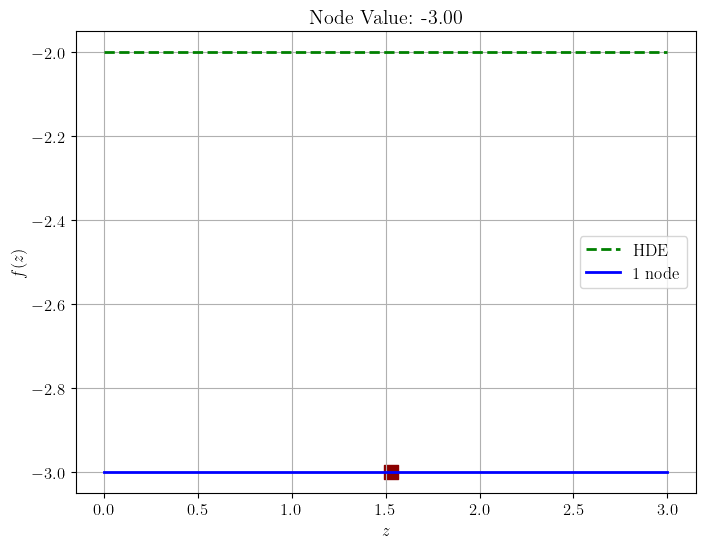

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",  # Use serif font
    "font.size": 12,  # Set font size
})

# Initialize cosmology models
T = SplineGHDECosmology(mean=-2.0, nodes=0, interp='lineal')
T1 = SplineGHDECosmology(mean=-2.0, nodes=1, interp='lineal')

# Define colors and markers
colors = {0: 'darkgreen', 1: 'blue'}
marker = 's'  # Square marker for nodes

# Define range of node values
param_values = np.linspace(-3.0, -1.0, 10)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot in animation
def update(frame):
    ax.clear()
    ax.plot(T.zvals, [T.ffunc(i) for i in T.zvals], '--',color='green', label='HDE', linewidth=2)
    
    node_value = param_values[frame]
    T1.params[0].setValue(node_value)
    T1.updateParams([T1.params[0]])
    ax.plot(T1.zvals, [T1.ffunc(i) for i in T1.zvals], color=colors[1], label='1 node', linewidth=2)
    
    node_z = T1.zvals[len(T1.zvals) // 2]  # Middle of the redshift range
    node_f = T1.ffunc(node_z)
    ax.scatter(node_z, node_f, color='darkred', marker=marker, s=100)
    
    ax.set_xlabel('$z$')
    ax.set_ylabel('$f(z)$')
    ax.grid()
    ax.legend()
    ax.set_title(f'Node Value: {node_value:.2f}')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(param_values), interval=800)

# Display animation
HTML(ani.to_jshtml())


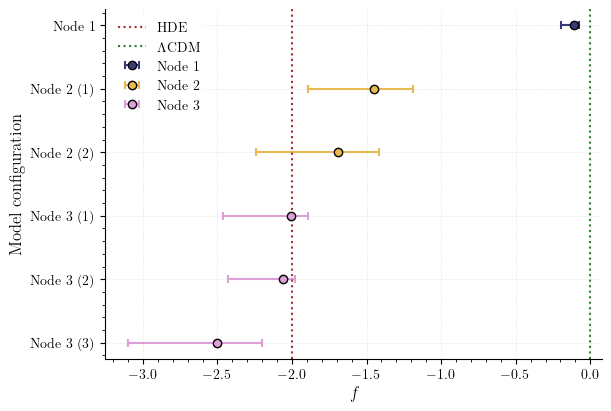

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Data with multiple entries per node
data = {
    "Node 1": [[-0.107, 0.09, 0.032]],
    "Node 2": [[-1.45, 0.44, 0.26], [-1.69, 0.55, 0.27]],
    "Node 3": [[-2.01, 0.45, 0.12], [-2.059, 0.37, 0.08], [-2.5, 0.6, 0.3]],
}


node_names = list(data.keys())
cmap = cm.get_cmap('tab20b', len(node_names)) 
node_colors = {name: cmap(i) for i, name in enumerate(node_names)}

# Initialize plot with constrained layout
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)

yticks = []
yticklabels = []
y_index = 0

# Plot each data point with error bars
for label in data:
    entries = data[label]
    for i, (val, err_low, err_up) in enumerate(entries):
        # Main errorbar plot
        ax.errorbar(
            val, y_index, 
            xerr=[[err_low], [err_up]], 
            fmt='o', 
            markersize=6,
            markeredgecolor='black',
            markerfacecolor=node_colors[label],
            ecolor=node_colors[label], 
            elinewidth=1.5,
            capsize=3,
            capthick=1.5,
            label=label if i == 0 else None  
        )
        
        # Add entry label
        entry_label = f"{label} ({i+1})" if len(entries) > 1 else label
        yticklabels.append(entry_label)
        yticks.append(y_index)
        y_index += 1


ax.axvline(-2, color='darkred', linestyle=':', linewidth=1.5, alpha=0.8, label=r'HDE')
ax.axvline(0, color='darkgreen', linestyle=':', linewidth=1.5, alpha=0.8, label=r'$\Lambda$CDM')

# Formatting
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.invert_yaxis()  # Put first entry at the top

# Axis labels with proper LaTeX formatting
ax.set_xlabel(r'$f$')
ax.set_ylabel(r'Model configuration')

# Add minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Grid and spines
ax.grid(True, which='major', linestyle=':', linewidth=0.5, alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend with better placement
ax.legend(
    loc='best', 
    frameon=True, 
    framealpha=0.9,
    edgecolor='none'
)

# Save high-quality PDF
plt.savefig(
    'amplitude_comparison.pdf', 
    dpi=300, 
    bbox_inches='tight', 
    pad_inches=0.05
)

plt.show()

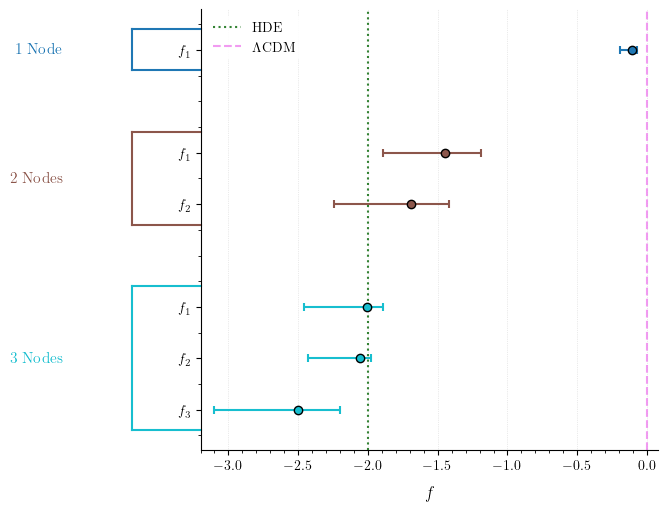

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 11,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# Data with multiple entries per node
data = {
    "1 Node": [[-0.107, 0.09, 0.032]],
    "2 Nodes": [[-1.45, 0.44, 0.26], [-1.69, 0.55, 0.27]],
    "3 Nodes": [[-2.01, 0.45, 0.12], [-2.059, 0.37, 0.08], [-2.5, 0.6, 0.3]],
}

# Generate distinct colors for each node group
node_names = list(data.keys())
cmap = cm.get_cmap('tab10', len(node_names))
node_colors = {name: cmap(i) for i, name in enumerate(node_names)}

# Initialize plot
fig, ax = plt.subplots(figsize=(6.5, 5), constrained_layout=True)

yticks = []
yticklabels = []
y_index = 0
y_groups = {}

# Plot each data point with error bars
for label in data:
    entries = data[label]
    y_groups[label] = {'min': y_index, 'max': y_index + len(entries) - 1}
    
    for i, (val, err_low, err_up) in enumerate(entries):
        # Main errorbar plot (no label to remove from legend)
        ax.errorbar(
            val, y_index, 
            xerr=[[err_low], [err_up]], 
            fmt='o', 
            markersize=6,
            markeredgecolor='black',
            markerfacecolor=node_colors[label],
            ecolor=node_colors[label], 
            elinewidth=1.5,
            capsize=3,
            capthick=1.5,
            label=None  # Removed label to exclude from legend
        )
        
        # Function labels
        if label == "1 Node":
            yticklabels.append(r"$f_1$")
        elif label == "2 Nodes":
            yticklabels.append(r"$f_{}$".format(i+1))
        elif label == "3 Nodes":
            yticklabels.append(r"$f_{}$".format(i+1))
            
        yticks.append(y_index)
        y_index += 1
    
    # Add space between groups
    y_index += 1

# Add bracket outlines closer to the y-axis
bracket_width = 0.15  # Narrower brackets
for label in node_names:
    group = y_groups[label]
    y_center = (group['min'] + group['max']) / 2
    height = group['max'] - group['min'] + 0.8
    
    # Left vertical line (closer to y-axis)
    ax.plot(
        [-0.15, -0.15],  # Moved closer to y-axis
        [group['min'] - 0.4, group['max'] + 0.4],
        color=node_colors[label],
        linewidth=1.5,
        clip_on=False,
        transform=ax.get_yaxis_transform()
    )
    
    # Top horizontal line
    ax.plot(
        [-0.15, -0.15 + bracket_width],
        [group['min'] - 0.4, group['min'] - 0.4],
        color=node_colors[label],
        linewidth=1.5,
        clip_on=False,
        transform=ax.get_yaxis_transform()
    )
    
    # Bottom horizontal line
    ax.plot(
        [-0.15, -0.15 + bracket_width],
        [group['max'] + 0.4, group['max'] + 0.4],
        color=node_colors[label],
        linewidth=1.5,
        clip_on=False,
        transform=ax.get_yaxis_transform()
    )
    
    # Group label moved closer to brackets
    ax.text(
        -0.3, y_center,  # Moved closer to brackets
        label,
        ha='right',
        va='center',
        color=node_colors[label],
        fontsize=11,
        fontweight='bold',
        transform=ax.get_yaxis_transform()
    )

# Add reference lines (only these will appear in legend)
ax.axvline(-2, color='darkgreen', linestyle=':', linewidth=1.5, alpha=0.8, label=r'HDE')
ax.axvline(0, color='violet', linestyle='--', linewidth=1.5, alpha=0.8, label=r'$\Lambda$CDM')

# Formatting
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.invert_yaxis()

ax.set_xlabel(r'$f$', labelpad=10)
ax.set_xlim(left=-3.2)

# Add minor ticks and grid
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='major', axis='x', linestyle=':', linewidth=0.5, alpha=0.5)

# Clean up spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Legend (now only shows reference lines)
ax.legend(
    loc='best', 
    frameon=True, 
    framealpha=0.9,
    edgecolor='none'
)

plt.savefig(
    'function_cases_comparison.pdf',
    dpi=300, 
    bbox_inches='tight', 
    pad_inches=0.05,
    transparent=True
)

plt.show()

INFO:texmanager.py._get_font_preamble_and_command():160      No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO:texmanager.py._get_font_preamble_and_command():160      No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO:texmanager.py._get_font_preamble_and_command():160      No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO:texmanager.py._get_font_preamble_and_command():160      No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO:texmanager.py._get_font_preamble_and_command():160      No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO:texmanager.py._get_font_preamble_and_command():160      No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO:texmanager.py._get_font_preamble_and_command():160      No LaTeX-compatible font found for the serif fontfamily in rcParams. 

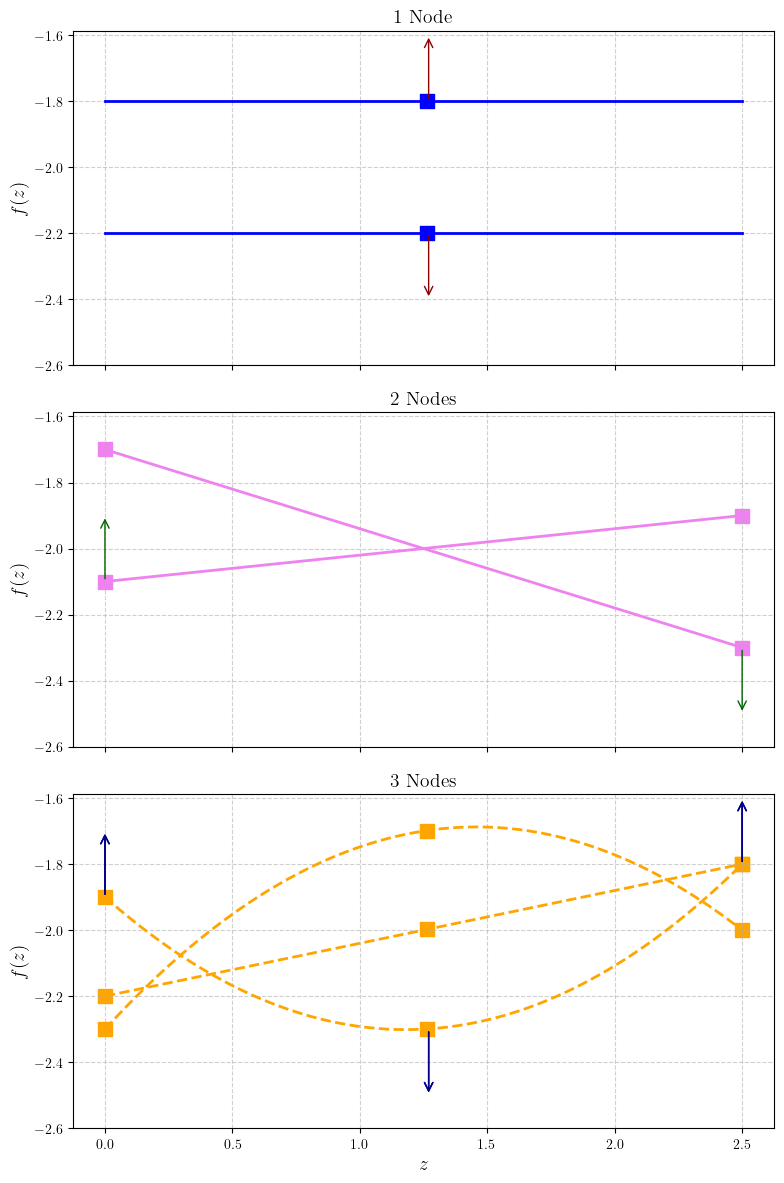

In [99]:
import matplotlib.pyplot as plt
from datetime import datetime

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

# Initialize SplineGHDECosmology instances
T1 = SplineGHDECosmology(mean=-2.0, nodes=1, interp='lineal')
T2 = SplineGHDECosmology(mean=-2.0, nodes=2, interp='lineal')
T3 = SplineGHDECosmology(mean=-2.0, nodes=3, interp='cubic')

# Define node values
nodes_1 = [-2.2, -1.8]
nodes_2 = [[-2.1, -1.9], [-1.7, -2.3]]
nodes_3 = [[-2.2, -2.0, -1.8], [-1.9, -2.3, -1.8], [-2.3, -1.7, -2.0]]

# Define colors and marker
colors = {1: 'blue', 2: 'violet', 3: 'orange'}
marker = 's'

# Create figure with 3 vertical subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Collect all f(z) values for dynamic y-axis limits
all_f_values = []

# Plot 1-node case (top subplot)
if hasattr(T1, 'zvals') and len(T1.zvals) > 0:
    for i, node_value in enumerate(nodes_1):
        T1.params[0].setValue(node_value)
        T1.updateParams([T1.params[0]])
        f_vals = [T1.ffunc(z) for z in T1.zvals]
        all_f_values.extend(f_vals)
        ax1.plot(T1.zvals, f_vals, color=colors[1], linewidth=2)
        node_z = T1.zvals[len(T1.zvals) // 2]
        ax1.scatter(node_z, T1.ffunc(node_z), color=colors[1], marker=marker, s=100)
    # Add arrows at z=1.25
    ax1.annotate('', xy=(1.27, -1.8), xytext=(1.27, -1.6),
                 arrowprops=dict(arrowstyle='<-', color='darkred'), fontsize=15)
    ax1.annotate('', xy=(1.27, -2.4), xytext=(1.27, -2.2),
                 arrowprops=dict(arrowstyle='->', color='darkred'), fontsize=15)
    ax1.set_ylabel('$f(z)$', fontsize=14)
    ax1.set_title('1 Node', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.6)
    #ax1.legend(fontsize=12, loc='upper right')
else:
    raise ValueError("zvals is not defined or empty in SplineGHDECosmology")

# Plot 2-node case (middle subplot)
for i, nodes in enumerate(nodes_2):
    T2.params[0].setValue(nodes[0])
    T2.params[1].setValue(nodes[1])
    T2.updateParams([T2.params[0], T2.params[1]])
    f_vals = [T2.ffunc(z) for z in T2.zvals]
    all_f_values.extend(f_vals)
    ax2.plot(T2.zvals, f_vals, color=colors[2], label=f'2 nodes {nodes}', linewidth=2)
    for z in [T2.zvals[0], T2.zvals[-1]]:
        ax2.scatter(z, T2.ffunc(z), color=colors[2], marker=marker, s=100)
ax2.annotate('', xy=(0.0, -2.1), xytext=(0.0, -1.9),
                 arrowprops=dict(arrowstyle='<-', color='darkgreen'), fontsize=15)
ax2.annotate('', xy=(2.5, -2.5), xytext=(2.5, -2.3),
                 arrowprops=dict(arrowstyle='->', color='darkgreen'), fontsize=15)
ax2.set_ylabel('$f(z)$', fontsize=14)
ax2.set_title('2 Nodes', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.6)
#ax2.legend(fontsize=12, loc='upper right')

# Plot 3-node case (bottom subplot)


for i, nodes in enumerate(nodes_3):
    for j, param in enumerate(T3.params[:3]):
        param.setValue(nodes[j])
    T3.updateParams(T3.params[:3])
    f_vals = [T3.ffunc(z) for z in T3.zvals]
    all_f_values.extend(f_vals)
    ax3.plot(T3.zvals, f_vals, '--', color=colors[3], label=f'3 nodes {nodes}', linewidth=2)
    ax3.annotate('', xy=(0.0, -1.9), xytext=(0.0, -1.7),
                 arrowprops=dict(arrowstyle='<-', color='darkblue'), fontsize=15)
    ax3.annotate('', xy=(1.27, -2.5), xytext=(1.27, -2.3),
                 arrowprops=dict(arrowstyle='->', color='darkblue'), fontsize=15)
    ax3.annotate('', xy=(2.5, -1.8), xytext=(2.5, -1.6),
                 arrowprops=dict(arrowstyle='<-', color='darkblue'), fontsize=15)
    for z in [T3.zvals[0], T3.zvals[len(T3.zvals) // 2], T3.zvals[-1]]:
        ax3.scatter(z, T3.ffunc(z), color=colors[3], marker=marker, s=100)

ax3.set_xlabel('$z$', fontsize=14)
ax3.set_ylabel('$f(z)$', fontsize=14)
ax3.set_title('3 Nodes', fontsize=14)
ax3.grid(True, linestyle='--', alpha=0.6)
#ax3.legend(fontsize=12, loc='upper right')

# Set dynamic y-axis limits with buffer for arrows
y_min = min(all_f_values + [-2.5, -1.8]) - 0.1
y_max = max(all_f_values + [-2.5, -1.8]) + 0.1
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(y_min, y_max)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig(
    '/home/alfonsozapata/Documentos/Noldal_hde/HDENodalRec/Plots/nodal_diagram.pdf',
    dpi=300, 
    bbox_inches='tight', 
    pad_inches=0.05,
    transparent=True
)

# Show plot
plt.show()

INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.HTMLWriter'>


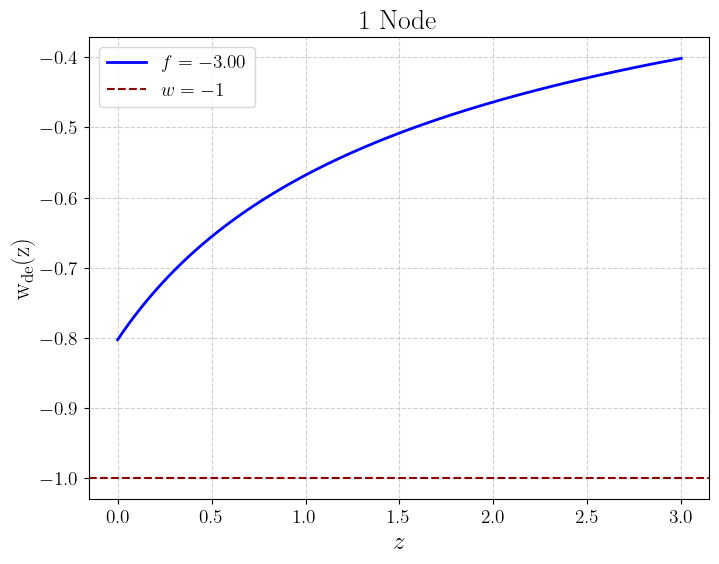

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 14,
})

# Initialize the SplineGHDECosmology instance for 1 node
nodes = 1
T = SplineGHDECosmology(mean=-2.0, nodes=nodes, interp='lineal')

# Define the range of parameter values
param_values = np.linspace(-3.0, -1.0, 10)  # 10 values in the range for visualization

# Define the redshift range
zvals = np.linspace(0, 3, 100)

# Create a colormap
ccmap = plt.cm.winter
norm = plt.Normalize(vmin=param_values.min(), vmax=param_values.max())

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot in animation
def update(frame):
    ax.clear()
    p = param_values[frame]
    
    # Update the parameter
    T.params[0].value = p
    T.updateParams([T.params[0]])
    
    # Compute the equation of state (EoS) for the given parameter value
    eos_values = [T.EoS(z) for z in zvals]
    
    # Assign color based on parameter value
    color = ccmap(norm(p))
    
    # Plot the EoS values
    ax.plot(zvals, eos_values, color=color, linewidth=2, label=f'$f = {p:.2f}$')
    
    # Add labels and layout
    ax.set_xlabel(r"$z$", fontsize=18)
    ax.set_ylabel(r"$\rm w_{de}(z)$", fontsize=18)
    ax.set_title(r"1 Node", fontsize=20)
    
    # Add a horizontal line at w = -1
    ax.axhline(y=-1.0, linestyle='--', color='darkred', label='$ w = -1$')
    
    # Add a grid
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(param_values), interval=500)

# Display animation
HTML(ani.to_jshtml())


INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.PillowWriter'>
INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.HTMLWriter'>


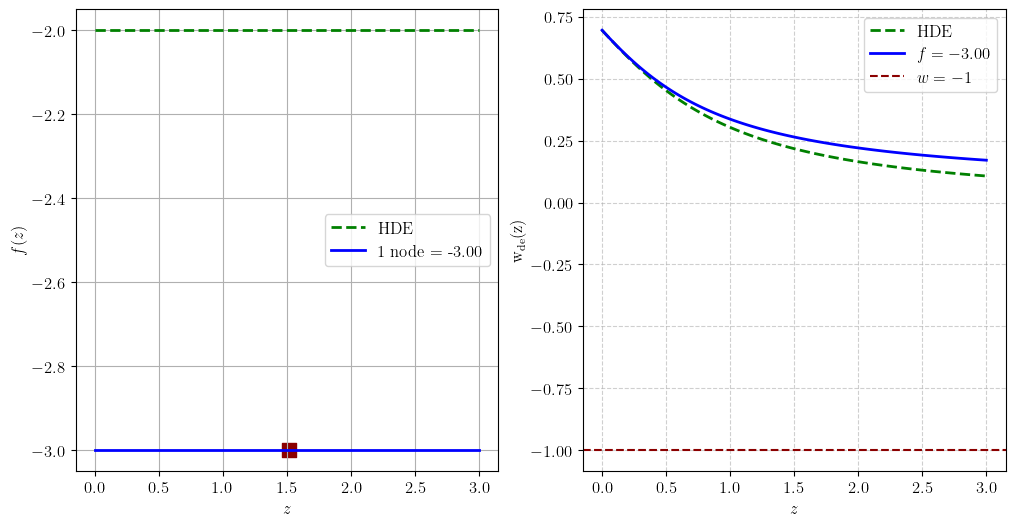

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

# Initialize cosmology models
T = SplineGHDECosmology(mean=-2.0, nodes=0, interp='lineal')
T1 = SplineGHDECosmology(mean=-2.0, nodes=1, interp='lineal')


colors = {0: 'darkgreen', 1: 'blue'}
marker = 's'  


param_values = np.linspace(-3.0, -1.0, 15)


zvals = np.linspace(0, 3, 100)

c_fix = 1.0
T.c_par.setValue(c_fix)
T.updateParams([T.c_par])


T1.c_par.setValue(c_fix)
T1.updateParams([T.c_par])

ccmap = plt.cm.winter
norm = plt.Normalize(vmin=param_values.min(), vmax=param_values.max())


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axes


def update(frame):
    node_value = param_values[frame]
    ax1.clear()
    ax2.clear()
    
    # Left plot: f(z)
    ax1.plot(T.zvals, [T.ffunc(i) for i in T.zvals], '--', color='green', label='HDE', linewidth=2)
    T1.params[0].setValue(node_value)
    T1.updateParams([T1.params[0]])
    ax1.plot(T1.zvals, [T1.ffunc(i) for i in T1.zvals], color=colors[1], label=f'1 node = {node_value:.2f}', linewidth=2)
    node_z = T1.zvals[len(T1.zvals) // 2]
    node_f = T1.ffunc(node_z)
    ax1.scatter(node_z, node_f, color='darkred', marker=marker, s=100)
    ax1.set_xlabel('$z$')
    ax1.set_ylabel('$f(z)$')
    ax1.legend()
    ax1.grid()
    
    # Right plot: w_de(z)
    T1.params[0].setValue(node_value)
    eos_values = [T1.Ode(z) for z in zvals]
    color = ccmap(norm(node_value))
    ax2.plot(T.zvals, [T.Ode(i) for i in T.zvals], '--', color='green', label='HDE', linewidth=2)
    ax2.plot(zvals, eos_values, color=color, linewidth=2, label=f'$f = {node_value:.2f}$')
    ax2.axhline(y=-1.0, linestyle='--', color='darkred', label='$w = -1$')
    ax2.set_xlabel(r"$z$")
    ax2.set_ylabel(r"$\rm w_{de}(z)$")
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend()


ani = animation.FuncAnimation(fig, update, frames=len(param_values), interval=900)
# 
#ani.save("1node.mp4", writer="ffmpeg", fps=3)

ani.save("11node.gif", writer="pillow", fps=1)

HTML(ani.to_jshtml())


INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.PillowWriter'>
INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.HTMLWriter'>


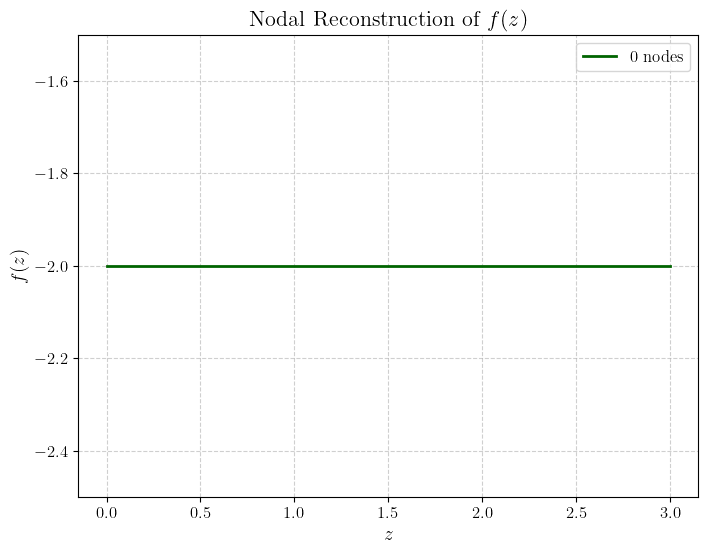

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,  
    "font.family": "serif",  
    "font.size": 12,  
})

# Initialize the SplineGHDECosmology instances
T = SplineGHDECosmology(mean=-2.0, nodes=0, interp='lineal')   
T1 = SplineGHDECosmology(mean=-2.0, nodes=1, interp='lineal')  
T2 = SplineGHDECosmology(mean=-2.0, nodes=2, interp='lineal')  
T3 = SplineGHDECosmology(mean=-2.0, nodes=3, interp='lineal')  

# Define the node values
nodo1 = [-2.2, -1.8]  
nodo2 = [[-2.1, -1.9], [-1.7, -2.3]]  
nodo3 = [[-2.2, -2.0, -1.8], [-1.9, -2.3, -1.8], [-2.3, -1.7, -2.0]]  

# Define colors and markers
colors = {0: 'darkgreen', 1: 'blue', 2: 'violet', 3: 'orange'}
marker = 's'

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Animation function
def update(frame):
    ax.clear()
    ax.set_xlabel('$z$', fontsize=14)
    ax.set_ylabel('$f(z)$', fontsize=14)
    ax.set_title('Nodal Reconstruction of $f(z)$', fontsize=16)
    ax.set_ylim(-2.5, -1.5)  
    ax.grid(True, linestyle='--', alpha=0.6)  
    
    if frame == 0:  
        ax.plot(T.zvals, [T.ffunc(i) for i in T.zvals], color=colors[0], label='0 nodes', linewidth=2)

    elif frame == 1:  
        label_set = False
        for node_value in nodo1:
            T1.params[0].setValue(node_value)
            T1.updateParams([T1.params[0]])
            label = '1 node' if not label_set else None  # Assign label only once
            ax.plot(T1.zvals, [T1.ffunc(i) for i in T1.zvals], color=colors[1], linewidth=2, label=label)
            label_set = True  
            
            node_z = T1.zvals[len(T1.zvals) // 2]
            node_f = T1.ffunc(node_z)
            ax.scatter(node_z, node_f, color='darkred', marker=marker, s=100)

    elif frame == 2:  
        label_set = False
        for nodes in nodo2:
            T2.params[0].setValue(nodes[0])
            T2.params[1].setValue(nodes[1])
            T2.updateParams([T2.params[0], T2.params[1]])
            label = '2 nodes' if not label_set else None
            ax.plot(T2.zvals, [T2.ffunc(i) for i in T2.zvals], color=colors[2], linewidth=2, label=label)
            label_set = True  
            
            node_zs = [T2.zvals[0], T2.zvals[-1]]
            node_fs = [T2.ffunc(node_zs[0]), T2.ffunc(node_zs[1])]
            ax.scatter(node_zs, node_fs, color='darkred', marker=marker, s=100)

    elif frame == 3:  
        label_set = False
        for nodes in nodo3:
            T3.params[0].setValue(nodes[0])
            T3.params[1].setValue(nodes[1])
            T3.params[2].setValue(nodes[2])
            T3.updateParams([T3.params[0], T3.params[1], T3.params[2]])
            label = '3 nodes' if not label_set else None
            ax.plot(T3.zvals, [T3.ffunc(i) for i in T3.zvals], color=colors[3], linewidth=2, label=label)
            label_set = True  
            
            node_zs = [T3.zvals[0], T3.zvals[len(T3.zvals) // 2], T3.zvals[-1]]
            node_fs = [T3.ffunc(node_zs[0]), T3.ffunc(node_zs[1]), T3.ffunc(node_zs[2])]
            ax.scatter(node_zs, node_fs, color='darkred', marker=marker, s=100)

    ax.legend(fontsize=12, loc='upper right')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=4, interval=2000, repeat=True)



ani.save("nodalf.gif", writer="pillow", fps=1)
# Display the animation in Jupyter Notebook
HTML(ani.to_jshtml())


INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.PillowWriter'>
INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.HTMLWriter'>


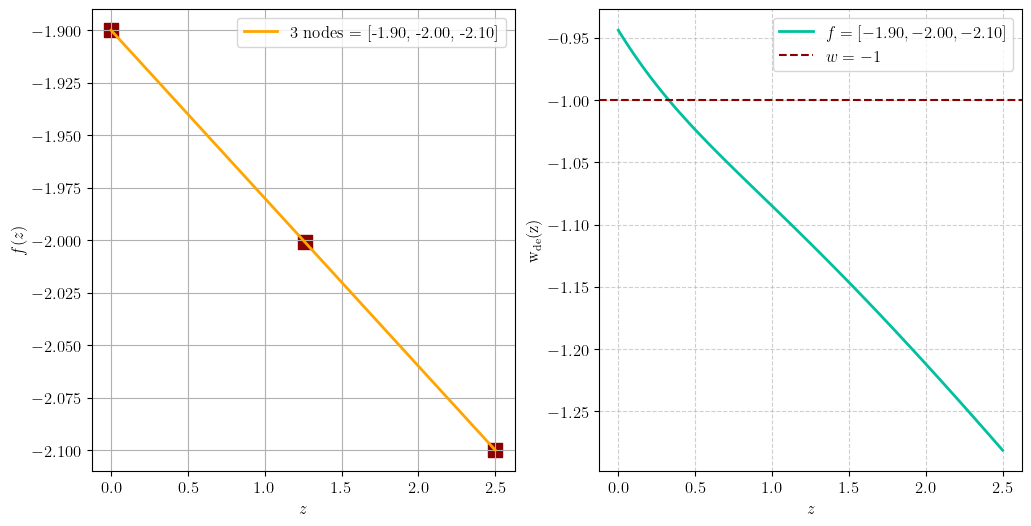

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

# Initialize the 3-node cosmology model
T3 = SplineGHDECosmology(mean=-2.0, nodes=3)

# Define redshift values
zvals = T3.zvals

# Fix parameter c for T3 model
c_fix = 1.0
T3.c_par.setValue(c_fix)
T3.updateParams([T3.c_par])




# Define predefined node values (ensuring the range -2.2 to -1.8)
node_cases = [
    [-1.9, -2.0, -2.1],  
    [-2.1, -1.9, -1.8],  
    [-2.1, -2.1, -2.0],  
    [-2.0, -1.9, -1.8], 
    [-2.0, -2.0, -2.0], 
    [-2.3, -2.2, -2.0],
    [-1.7, -1.8, -1.9]   
]

# Define color map and normalization
ccmap = plt.cm.winter
norm = plt.Normalize(vmin=-2.2, vmax=-1.8)

# Define figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axes

# Animation update function
def update(frame):
    ax1.clear()
    ax2.clear()

    # Get node values for this frame
    node1, node2, node3 = node_cases[frame]

    # Update parameters
    T3.params[0].setValue(node1)
    T3.params[1].setValue(node2)
    T3.params[2].setValue(node3)
    T3.updateParams([T3.params[0], T3.params[1], T3.params[2]])

    # Left plot: f(z)
    ax1.plot(T3.zvals, [T3.ffunc(i) for i in T3.zvals], color='orange', label=f'3 nodes = [{node1:.2f}, {node2:.2f}, {node3:.2f}]', linewidth=2)
    node_zs = [T3.zvals[0], T3.zvals[len(T3.zvals) // 2], T3.zvals[-1]]  
    node_fs = [T3.ffunc(node_zs[0]), T3.ffunc(node_zs[1]), T3.ffunc(node_zs[2])]
    ax1.scatter(node_zs, node_fs, color='darkred', marker='s', s=100)
    ax1.set_xlabel('$z$')
    ax1.set_ylabel('$f(z)$')
    ax1.legend()
    ax1.grid()

    # Right plot: w_de(z)
    eos_values = [T3.EoS(z) for z in zvals]
    color = ccmap(norm(node1))
    ax2.plot(zvals, eos_values, color=color, linewidth=2, label=f'$f = [{node1:.2f}, {node2:.2f}, {node3:.2f}]$')
    ax2.axhline(y=-1.0, linestyle='--', color='darkred', label='$w = -1$')
    ax2.set_xlabel(r"$z$")
    ax2.set_ylabel(r"$\rm w_{de}(z)$")
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(node_cases), interval=2500)

# Save animation as a GIF
ani.save("3nodes.gif", writer="pillow", fps=0.5)

# Display animation in Jupyter Notebook
HTML(ani.to_jshtml())


INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.HTMLWriter'>


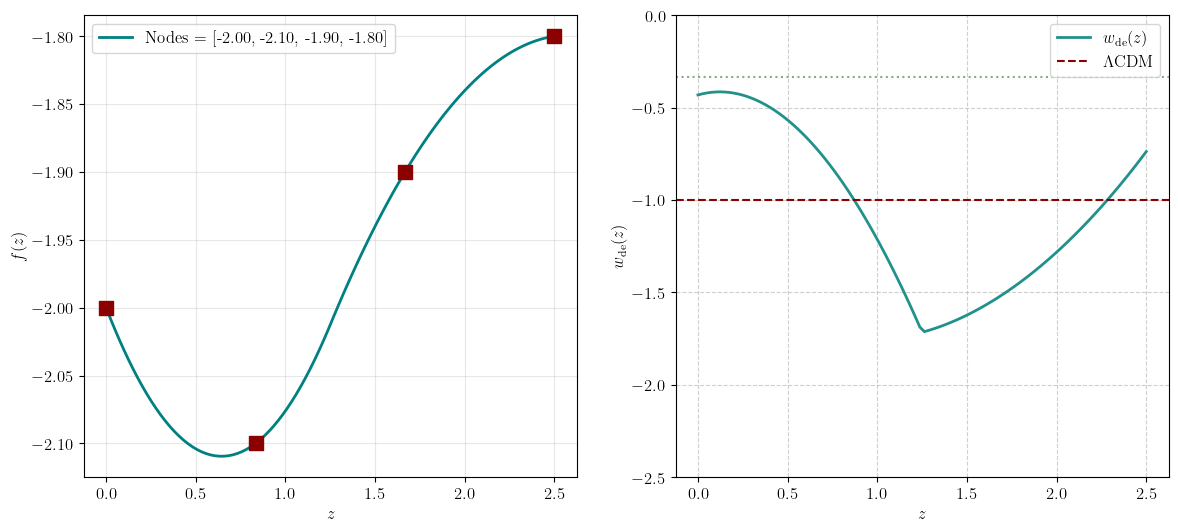

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

# Initialize the 4-node cosmology model
T4 = SplineGHDECosmology(mean=-2.0, nodes=4, interp='cubic')  # Now using cubic splines

# Define redshift values
zvals = T.zvals

# Fix parameter c for T4 model
c_fix = 1.0
T4.c_par.setValue(c_fix)
T4.updateParams([T4.c_par])

# Define predefined node values (4 nodes, range -2.2 to -1.8)
node_cases = [
    [-2.0, -2.1, -1.9, -1.8],    # Decreasing then increasing
    [-1.8, -1.9, -2.1, -2.0],    # Increasing then decreasing
    [-2.1, -2.0, -2.0, -2.1],    # Symmetric "bowl"
    [-1.9, -1.95, -2.05, -2.1],   # Smooth transition
    [-2.2, -2.0, -1.9, -1.8],     # Steep to flat
    [-2.0, -2.0, -2.0, -2.0],     # Constant (ΛCDM-like)
    [-1.8, -1.85, -2.15, -2.2]    # Inverse transition
]

# Define color map and normalization
ccmap = plt.cm.viridis  # More perceptually uniform than 'winter'
norm = plt.Normalize(vmin=-2.2, vmax=-1.8)

# Define figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1, ax2 = axes

# Animation update function
def update(frame):
    ax1.clear()
    ax2.clear()
    
    # Get node values for this frame
    nodes = node_cases[frame]
    
    # Update parameters
    for i in range(4):
        T4.params[i].setValue(nodes[i])
    T4.updateParams(T4.params[:4])  # Update all 4 nodes
    
    # Node positions (equally spaced in z)
    node_zs = np.linspace(T4.zini, T4.zend, 4)
    
    # --- Left plot: f(z) ---
    f_values = [T4.ffunc(z) for z in T4.zvals]
    ax1.plot(T4.zvals, f_values, color='teal', 
             label=f'Nodes = [{", ".join(f"{n:.2f}" for n in nodes)}]', 
             linewidth=2)
    
    # Mark nodes
    ax1.scatter(node_zs, nodes, color='darkred', marker='s', s=100, zorder=5)
    
    ax1.set_xlabel('$z$')
    ax1.set_ylabel('$f(z)$')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # --- Right plot: w_de(z) ---
    eos_values = [T4.EoS(z) for z in zvals]
    color = ccmap(norm(nodes[0]))  # Color by first node value
    
    ax2.plot(zvals, eos_values, color=color, linewidth=2, 
             label=f'$w_{{\\rm de}}(z)$')
    ax2.axhline(y=-1.0, linestyle='--', color='darkred', label='$\\Lambda$CDM')
    
    # Add phantom divide line
    ax2.axhline(y=-1/3, linestyle=':', color='darkgreen', alpha=0.5)
    
    ax2.set_xlabel(r"$z$")
    ax2.set_ylabel(r"$w_{\rm de}(z)$")
    ax2.set_ylim(-2.5, 0)  # Expanded range for better visibility
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(node_cases), interval=1500,
                             repeat_delay=3000)

#ani.save("4nodes.gif", writer="pillow", fps=0.5)

# Display in notebook
HTML(ani.to_jshtml())

INFO:animation.py.save():1042     Animation.save using <class 'matplotlib.animation.HTMLWriter'>
/home/alfonsozapata/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/alfonsozapata/SimpleMC/simplemc/models/SplineGHDECosmology.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  return q_term*(1 - Ode)/Ode
/home/alfonsozapata/SimpleMC/simplemc/models/SplineGHDECosmology.py:170: RuntimeWarning: invalid value encountered in double_scalars
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5*(func+2)/func)
/home/alfonsozapata/SimpleMC/simplemc/models/SplineGHDECosmology.py:128: RuntimeWarning: invalid value encountered in power
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5*(func+2)/func)
/home/alfonsozapata/SimpleMC/simplemc/models/SplineGHDECosmology.py:132: Run

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.2746177247736D+00   r2 =                  NaN


/home/alfonsozapata/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/alfonsozapata/SimpleMC/simplemc/models/SplineGHDECosmology.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  return q_term*(1 - Ode)/Ode
/home/alfonsozapata/SimpleMC/simplemc/models/SplineGHDECosmology.py:170: RuntimeWarning: invalid value encountered in double_scalars
  fact += -1*func*np.sqrt(Ode)/self.c_hde*ex_term**(0.5*(func+2)/func)


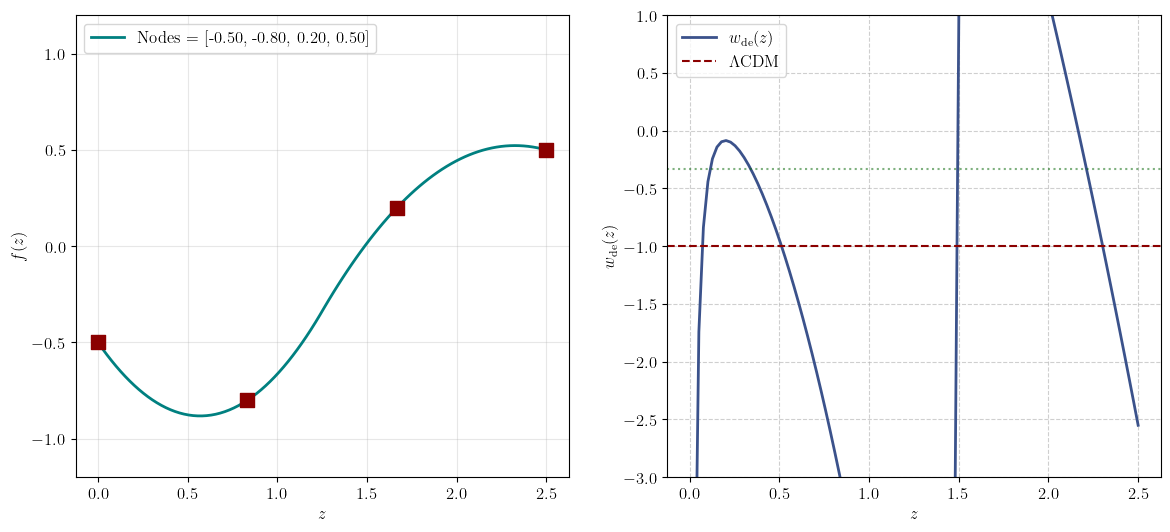

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set up LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
})

# Initialize the 4-node cosmology model
T4 = SplineGHDECosmology(mean=0.0, nodes=4, interp='cubic')  # Changed mean to 0.0

# Define redshift values
zvals = T.zvals

# Fix parameter c for T4 model
c_fix = 1.0
T4.c_par.setValue(c_fix)
T4.updateParams([T4.c_par])

# Define predefined node values (4 nodes, range -1.0 to 1.0)
node_cases = [
    [-0.5, -0.8, 0.2, 0.5],      # Decreasing then increasing
    [-0.2, -1.0, 1.0, 0.2],      # Decreasing throughout
    [0.2, 0.9, -0.9, -0.2],      # Oscillating behavior
    [-0.1, -0.5, 0.5, 0.1],      # Symmetric pattern
    [0.9, 0.6, 0.3, 0.0],        # Linear decrease
    [0.0, 0.0, 0.0, 0.0],        # Constant zero
    [-0.7, -0.3, 0.3, 0.7]       # Linear increase
]

# Define color map and normalization
ccmap = plt.cm.viridis
norm = plt.Normalize(vmin=-1.0, vmax=1.0)  # Adjusted range

# Define figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax1, ax2 = axes

# Animation update function
def update(frame):
    ax1.clear()
    ax2.clear()
    
    # Get node values for this frame
    nodes = node_cases[frame]
    
    # Update parameters
    for i in range(4):
        T4.params[i].setValue(nodes[i])
    T4.updateParams(T4.params[:4])
    
    # Node positions (equally spaced in z)
    node_zs = np.linspace(T4.zini, T4.zend, 4)
    
    # --- Left plot: f(z) ---
    f_values = [T4.ffunc(z) for z in T4.zvals]
    ax1.plot(T4.zvals, f_values, color='teal', 
             label=f'Nodes = [{", ".join(f"{n:.2f}" for n in nodes)}]', 
             linewidth=2)
    
    # Mark nodes
    ax1.scatter(node_zs, nodes, color='darkred', marker='s', s=100, zorder=5)
    
    ax1.set_xlabel('$z$')
    ax1.set_ylabel('$f(z)$')
    ax1.set_ylim(-1.2, 1.2)  # Adjusted y-limits
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # --- Right plot: w_de(z) ---
    eos_values = [T4.EoS(z) for z in zvals]
    color = ccmap(norm(nodes[0]))
    
    ax2.plot(zvals, eos_values, color=color, linewidth=2, 
             label=f'$w_{{\\rm de}}(z)$')
    ax2.axhline(y=-1.0, linestyle='--', color='darkred', label='$\\Lambda$CDM')
    
    # Add phantom divide line
    ax2.axhline(y=-1/3, linestyle=':', color='darkgreen', alpha=0.5)
    
    ax2.set_xlabel(r"$z$")
    ax2.set_ylabel(r"$w_{\rm de}(z)$")
    ax2.set_ylim(-3.0, 1.0)  # Expanded range
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.legend()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(node_cases), interval=1500,
                             repeat_delay=3000)

#ani.save("43nodes_around_zero.gif", writer="pillow", fps=0.5)
HTML(ani.to_jshtml())